In [106]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm
import numpy as np

#pm.help()
pm.init(debug=True)
pm.info()
df_jo = pm.df('df_jo')
df_jo.info()

Lista de dataframes: ['cr', 'fe', 'cr_cp', 'fe_cp', 'df_jo', 'df_jall']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32092 entries, 0 to 32091
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32092 non-null  int64          
 1   id_fe                       32092 non-null  int64          
 2   fe_cr_id                    21055 non-null  float64        
 3   user_id                     32092 non-null  int64          
 4   active                      32092 non-null  int64          
 5   created_at                  32092 non-null  datetime64[ns] 
 6   created_at_fe               21055 non-null  datetime64[ns] 
 7   amount                      32092 non-null  float64        
 8   fee                         21055 non-null  float64        
 9   stat_cr                     32092 non-null  object         
 10  stat_fe                     32092 

In [107]:
# Assuming 'df' is the DataFrame
unique_id_cr_with_moderated_at = df_jo[df_jo['moderated_at'].notna()]['id_cr'].nunique()
unique_id_cr_with_moderated_at 

16033

In [108]:
# Filter the rows where 'moderated_at' is not null and 'good_user' is 1
good_user_with_moderated_at = df_jo[df_jo['moderated_at'].notna() & (df_jo['needs_m_check'] == 1)]['id_cr'].nunique()
good_user_with_moderated_at

8395

In [114]:
# Convert the 'created_at' and 'moderated_at' columns to datetime
df_jo['created_at'] = pd.to_datetime(df_jo['created_at'])
df_jo['moderated_at'] = pd.to_datetime(df_jo['moderated_at'])

# Group the data by 'created_at' date and calculate the counts
result = df_jo.groupby(pd.Grouper(key='created_at', freq='W')).apply(
    lambda x: pd.Series({
        'unique_id_cr': x['id_cr'].nunique(),
        'unique_id_cr_with_moderated_at': x['id_cr'][x['moderated_at'].notna()].nunique(),
        'unique_id_cr_need_manual_check_moderated': x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check'] == 1)].nunique(),
        'unique_id_cr_need_manual_check': x['id_cr'][(x['needs_m_check'] == 1)].nunique(),
        # Calculate the difference between unique_id_cr_need_manual_check and unique_id_cr_need_manual_check_moderated
        'difference_in_manual_check': x['id_cr'][(x['needs_m_check'] == 1)].nunique() -
                                      x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check'] == 1)].nunique(),
        # Calculate the efficiency of moderated_at
        'efficiency_of_moderated_at': (
            x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check'] == 1)].nunique() / 
            x['id_cr'][x['moderated_at'].notna()].nunique() * 100  if x['id_cr'][x['moderated_at'].notna()].nunique() > 0 else 0
        ),
    })
).reset_index()

# Rename the columns to match the expected output
result.rename(columns={'created_at': 'date'}, inplace=True)

# Calculate the manual_check_percentage (unique_id_cr_with_moderated_at / unique_id_cr)
result['manual_check_percentage'] = (result['unique_id_cr_with_moderated_at'] / result['unique_id_cr']) * 100

result


C:\Users\ammanzano\AppData\Local\Temp\ipykernel_8152\2357391600.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_jo.groupby(pd.Grouper(key='created_at', freq='W')).apply(


,date,unique_id_cr,unique_id_cr_with_moderated_at,unique_id_cr_need_manual_check_moderated,unique_id_cr_need_manual_check,difference_in_manual_check,efficiency_of_moderated_at,manual_check_percentage
0,2019-11-24,1.0,1.0,1.0,1.0,0.0,100.000000,100.000000
1,2019-12-01,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
2,2019-12-08,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
3,2019-12-15,106.0,106.0,46.0,46.0,0.0,43.396226,100.000000
4,2019-12-22,119.0,119.0,61.0,61.0,0.0,51.260504,100.000000
5,2019-12-29,48.0,48.0,21.0,21.0,0.0,43.750000,100.000000
6,2020-01-05,37.0,37.0,13.0,13.0,0.0,35.135135,100.000000
7,2020-01-12,60.0,60.0,33.0,33.0,0.0,55.000000,100.000000
8,2020-01-19,38.0,38.0,18.0,18.0,0.0,47.368421,100.000000
9,2020-01-26,31.0,31.0,21.0,21.0,0.0,67.741935,100.000000


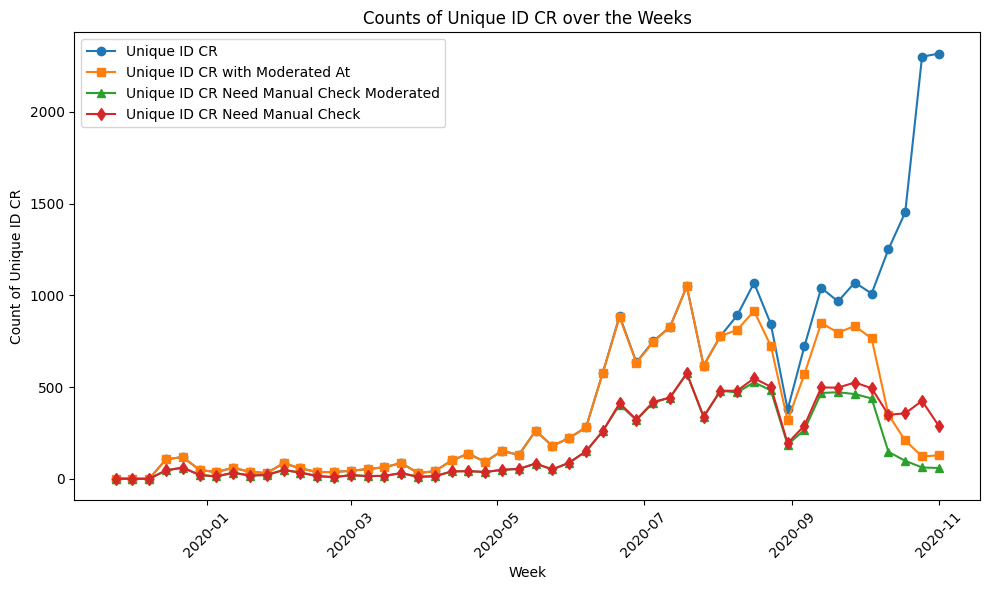

In [110]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the different series over time (weeks)
plt.plot(result['date'], result['unique_id_cr'], label='Unique ID CR', marker='o')
plt.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Unique ID CR with Moderated At', marker='s')
plt.plot(result['date'], result['unique_id_cr_need_manual_check_moderated'], label='Unique ID CR Need Manual Check Moderated', marker='^')
plt.plot(result['date'], result['unique_id_cr_need_manual_check'], label='Unique ID CR Need Manual Check', marker='d')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Count of Unique ID CR')
plt.title('Counts of Unique ID CR over the Weeks')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


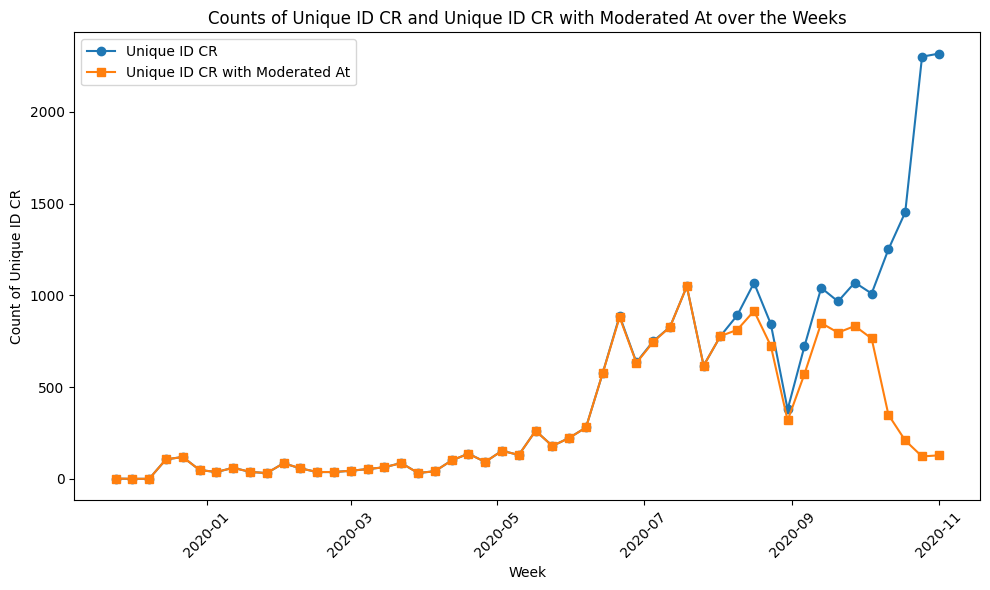

In [113]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the two series over time (weeks)
plt.plot(result['date'], result['unique_id_cr'], label='Unique ID CR', marker='o')
plt.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Unique ID CR with Moderated At', marker='s')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Count of Unique ID CR')
plt.title('Counts of Unique ID CR and Unique ID CR with Moderated At over the Weeks')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


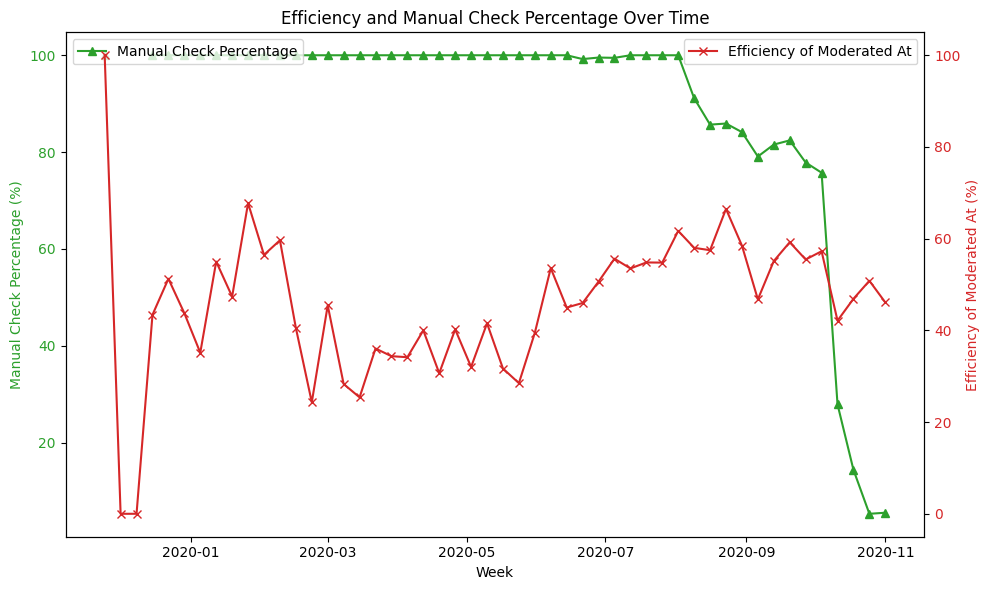

In [116]:
import matplotlib.pyplot as plt

# Plot the efficiency and manual check percentage metrics
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot manual_check_percentage on the first axis (ax1)
ax1.plot(result['date'], result['manual_check_percentage'], label='Manual Check Percentage', marker='^', color='tab:green')

# Add labels and title for the first y-axis
ax1.set_xlabel('Week')
ax1.set_ylabel('Manual Check Percentage (%)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Create a second y-axis to plot the efficiency metric
ax2 = ax1.twinx()

# Plot efficiency_of_moderated_at on the second axis (ax2)
ax2.plot(result['date'], result['efficiency_of_moderated_at'], label='Efficiency of Moderated At', marker='x', color='tab:red')

# Add labels for the second y-axis
ax2.set_ylabel('Efficiency of Moderated At (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and legend
plt.title('Efficiency and Manual Check Percentage Over Time')
fig.tight_layout()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


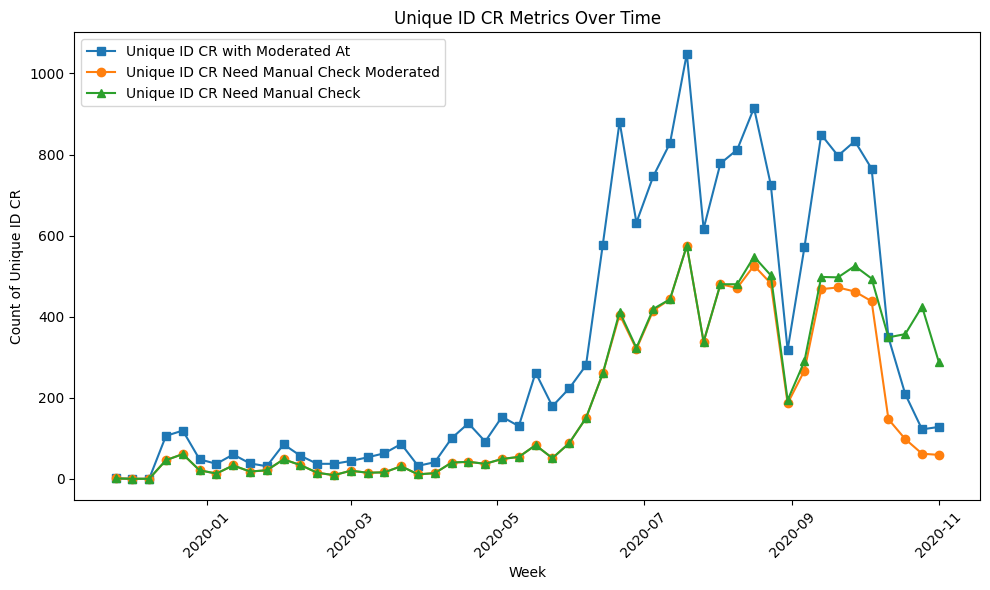

In [117]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the three metrics on the same axis
ax.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Unique ID CR with Moderated At', marker='s', color='tab:blue')
ax.plot(result['date'], result['unique_id_cr_need_manual_check_moderated'], label='Unique ID CR Need Manual Check Moderated', marker='o', color='tab:orange')
ax.plot(result['date'], result['unique_id_cr_need_manual_check'], label='Unique ID CR Need Manual Check', marker='^', color='tab:green')

# Add labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Count of Unique ID CR')
ax.set_title('Unique ID CR Metrics Over Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


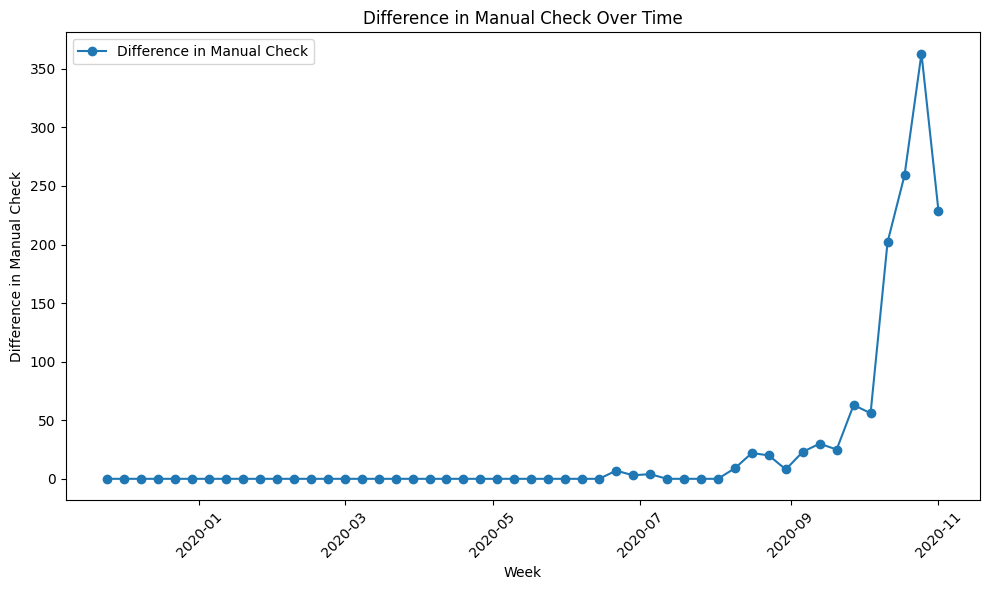

In [118]:
# Plot the difference_in_manual_check over time
plt.figure(figsize=(10, 6))
plt.plot(result['date'], result['difference_in_manual_check'], label='Difference in Manual Check', marker='o', color='tab:blue')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Difference in Manual Check')
plt.title('Difference in Manual Check Over Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()